In [1]:
#pip install sklearn
#!pip install fairlearn
#!pip install ipywidgets

In [2]:
import pandas as pd
from timeit import default_timer as timer
from sklearn import linear_model
import fairlearn

In [3]:
df=pd.read_csv('/Users/Armand/Capstone/final_training_testing.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(2)
sorted_df=df.sort_values(by='Timestamp_bid', ascending=True)

In [4]:
sorted_df.columns

Index(['Timestamp_bid', 'User-Agent_bid', 'Region ID_bids_join_impressions',
       'City ID', 'Ad Exchange', 'Ad Slot Width', 'Ad Slot Height',
       'Ad Slot Visibility', 'Ad Slot Format', 'Ad Slot Floor Price',
       'Bidding Price', 'Advertiser ID', 'User Profile IDs_bid',
       'Timestamp_imp', 'User-Agent_imp', 'Log Type', 'Paying Price',
       'User Profile IDs_imp', 'n_impressions', 'Timestamp', 'User-Agent',
       'User Profile IDs', 'Region ID_clicks', 'n_clicks', 'has impression',
       'has click', '10006', '10024', '10031', '10048', '10052', '10057',
       '10059', '10063', '10067', '10074', '10075', '10076', '10077', '10079',
       '10083', '10093', '10102', '10110', '10111', '10684', '11092', '11278',
       '11379', '11423', '11512', '11576', '11632', '11680', '11724', '11944',
       '13042', '13403', '13496', '13678', '13776', '13800', '13866', '13874',
       '14273', '16593', '16617', '16661', '16706'],
      dtype='object')

In [5]:
count_clicks=sorted_df[['Advertiser ID', 'has click']].groupby(['Advertiser ID']).sum()

In [6]:
count_values=sorted_df['Advertiser ID'].value_counts()

In [7]:
count_clicks

,has click
Advertiser ID,
1458,40
3358,30
3386,37
3427,35
3476,10


In [8]:
count_values

1458    196612
3386    190251
3427    162758
3476     86603
3358     63776
Name: Advertiser ID, dtype: int64

In [9]:
count_clicks['has click']/count_values

1458    0.000203
3358    0.000470
3386    0.000194
3427    0.000215
3476    0.000115
dtype: float64

In [10]:
sorted_df['has click'].sum()

152

In [41]:
features1=[#'Timestamp_bid'
  #, 'User-Agent_bid'
  #'Region ID_bids_join_impressions'
  'City ID'
  , 'Ad Exchange'
  , 'Ad Slot Width'
  , 'Ad Slot Height'
  , 'Ad Slot Visibility'
  , 'Ad Slot Format'
  , 'Ad Slot Floor Price'
  , 'Bidding Price'
  , 'Advertiser ID'  
  ]

target1='has impression'

In [42]:

X1_train_v1=sorted_df[features1][:10000]
X1_test_v1=sorted_df[features1][10000:11000]

y1_train_v1=sorted_df[target1][:10000]
y1_test_v1=sorted_df[target1][10000:11000]

print('X_train:', X1_train_v1.shape
      , '\nX_test: ', X1_test_v1.shape 
      , '\ny_train:', y1_train_v1.shape
      , '\ny_test: ', y1_test_v1.shape)

X_train: (10000, 9) 
X_test:  (1000, 9) 
y_train: (10000,) 
y_test:  (1000,)


# Baseline

In [43]:
print(X1_train_v1.shape)
print(X1_test_v1.shape)
print(y1_train_v1.shape)
print(y1_test_v1.shape)

training_accuracy=len(X1_train_v1[y1_train_v1==0])/len(y1_train_v1)
print ('Training Accuracy:',training_accuracy)

testing_accuracy=len(y1_test_v1[y1_test_v1==0])/len(y1_test_v1)
print ('Training Accuracy:',testing_accuracy)

(10000, 9)
(1000, 9)
(10000,)
(1000,)
Training Accuracy: 0.9549
Training Accuracy: 0.806


In [44]:
X1_train_v1.head()

,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID
0,85,2,336,280,2,0,5,300,3386
4,23,2,300,250,2,0,5,238,3358
11,81,2,336,280,2,0,5,238,3358
18,100,1,300,250,1,1,0,227,3358
20,341,1,300,250,2,1,0,227,3358


# Logreg

In [45]:
time_start = timer()
LogRegModel = linear_model.LogisticRegression(solver='saga', max_iter=20000)
LogRegModel = LogRegModel.fit(X1_train_v1,y1_train_v1)
time_end= timer()
print ("Wall time for training logit: %s second"%(time_end-time_start))

training_accuracy=LogRegModel.score(X1_train_v1,y1_train_v1)
print ('Training Accuracy:',training_accuracy)
test_accuracy = LogRegModel.score(X1_test_v1,y1_test_v1) 
print('Accuracy of the model on unseen test data: ', test_accuracy)

Wall time for training logit: 12.966739438998047 second
Training Accuracy: 0.9564
Accuracy of the model on unseen test data:  0.813


In [36]:
X1_test_v1.head()

,Timestamp_bid,Region ID_bids_join_impressions,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID
101564,20130606001420484,80,81,2,160,600,2,0,5,300,1458
101570,20130606001420516,201,202,2,728,90,2,0,5,300,1458
101590,20130606001420691,276,277,2,336,280,2,0,5,300,1458
101594,20130606001420727,79,79,2,728,90,1,0,5,300,1458
101600,20130606001420760,276,287,2,468,60,2,0,5,300,1458


In [37]:
from fairlearn.widget import FairlearnDashboard

FairlearnDashboard(y_true = y1_test_v1,
                   y_pred = LogRegModel.predict(X1_test_v1),
                   sensitive_features = X1_test_v1[['City ID']],
                   #sensitive_feature_names = ["City ID"]
                   )

FairlearnWidget(value={'true_y': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…

In [ ]:
'''from raiwidgets import FairnessDashboard

FairnessDashboard(y_true = y1_test_v1,
                   y_pred = LogRegModel.predict(X1_test_v1),
                   sensitive_features = X1_test_v1['City ID']
                   #sensitive_feature_names = ["City ID"]
                  )'''

# Fairlearn Example

In [ ]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


classifier = LogRegModel
classifier.fit(X1_train_v1, y1_train_v1)

y_pred = classifier.predict(X1_test_v1)
gm = MetricFrame(accuracy_score, y1_test_v1, y_pred, sensitive_features=X1_test_v1['Ad Exchange'])
print(gm.overall)
print(gm.by_group)

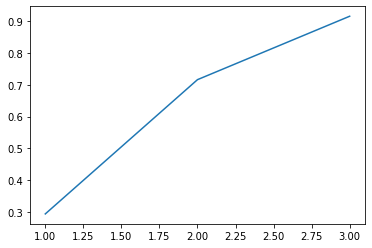

In [46]:
plt.plot(gm.by_group)

# Test on clicks

In [21]:
features2=df.drop(['has click' #target
  , 'n_clicks' #target 1:1
  , 'User Profile IDs_bid' #useless
  , 'User Profile IDs_imp' #redundant with dummification
  , 'Timestamp_bid'
  , 'Timestamp_imp'
  , 'Timestamp' #related to click
  , 'User-Agent' #related to click
  , 'User Profile IDs' #related to click
  , 'Region ID_clicks' #related to click
  , 'Log Type' #useless in our data format 
  , 'n_impressions'

  , 'User-Agent_bid' # for now let's ignore this as string too complex
  , 'User-Agent_imp' # for now let's ignore this as string too complex
  ], axis=1).columns
target2='has click'

In [22]:
#df[features2].isna().sum() --> we can fill na with 0 as there are some only for paying price and null profile ids

X2_train = sorted_df[features2][:100000].fillna(0)
X2_test = sorted_df[features2][100000:110000].fillna(0)

y2_train = sorted_df[target2][:100000]
y2_test = sorted_df[target2][100000:110000]

print('X2_train:', X2_train.shape
      , '\nX2_test: ', X2_test.shape 
      , '\ny2_train:', y2_train.shape
      , '\ny2_test: ', y2_test.shape)

X2_train: (100000, 55) 
X2_test:  (10000, 55) 
y2_train: (100000,) 
y2_test:  (10000,)


In [23]:
X2_train.sum()

Region ID_bids_join_impressions     15523553.0
City ID                             16060256.0
Ad Exchange                           264280.0
Ad Slot Width                       58046244.0
Ad Slot Height                      18465080.0
Ad Slot Visibility                     99073.0
Ad Slot Format                          9656.0
Ad Slot Floor Price                  5268206.0
Bidding Price                       27925199.0
Advertiser ID                      274847328.0
Paying Price                         1404803.0
has impression                         18716.0
10006                                  13816.0
10024                                   5430.0
10031                                   4574.0
10048                                   1427.0
10052                                   3524.0
10057                                   4395.0
10059                                   4832.0
10063                                  14348.0
10067                                    518.0
10074        

In [24]:
time_start = timer()
LogRegModel2 = linear_model.LogisticRegression(solver='saga', max_iter=20000)
LogRegModel2 = LogRegModel.fit(X2_train,y2_train)
time_end= timer()
print ("Wall time for training logit: %s second"%(time_end-time_start))

training_accuracy=LogRegModel.score(X2_train,y2_train)
print ('Training Accuracy:',training_accuracy)
test_accuracy = LogRegModel.score(X2_test,y2_test) 
print('Accuracy of the model on unseen test data: ', test_accuracy)

Wall time for training logit: 72.94821515700096 second
Training Accuracy: 0.99989
Accuracy of the model on unseen test data:  0.9997


In [31]:
from fairlearn.widget import FairlearnDashboard

FairlearnDashboard(y_true = y2_test,
                   y_pred = LogRegModel2.predict(X2_test),
                   sensitive_features = X2_test,
                   sensitive_feature_names = X2_test.columns.to_list()
                   )

FairlearnWidget(value={'true_y': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…

In [25]:

classifier = LogRegModel2
classifier.fit(X2_train, y2_train)

y_pred = classifier.predict(X2_test)
gm = MetricFrame(accuracy_score, y2_test, y_pred, sensitive_features=X2_test['10063'])
print(gm.overall)
print(gm.by_group)

NameError: name 'MetricFrame' is not defined

In [ ]:
plt.plot(gm.by_group)

## Test sklearn dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=1590, as_frame=True)
X = pd.get_dummies(data.data)
y_true = (data.target == '>50K') * 1
sex = data.data['sex']
sex.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [2]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)

y_pred = classifier.predict(X)
gm = MetricFrame(accuracy_score, y_true, y_pred, sensitive_features=sex)
print(gm.overall)
print(gm.by_group)

0.8443552680070431
sex
Female    0.925148
Male      0.804288
Name: accuracy_score, dtype: object


In [3]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(selection_rate, y_true, y_pred, sensitive_features=sex)
sr.overall

0.16385487899758405

In [ ]:
from raiwidgets import FairnessDashboard

FairnessDashboard(sensitive_features=sex,
                    #sensitive_feature_names=['sex'],
                    y_true=y_true,
                    y_pred={"initial model": y_pred}) 